# Machine Learning Basics

# 1. A linear classifier

In [1]:
%pdb

Automatic pdb calling has been turned OFF


In [2]:
import numpy as np
import sklearn

from matplotlib import pyplot as plt
from sklearn import datasets

### Data Acquisition

In [3]:
# load the data set
iris = datasets.load_iris()

print(iris.data.shape)
print("Features: %s" % iris.feature_names)

print(iris.target.shape)
print("Labels  : %s" % iris.target_names)

(150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
Labels  : ['setosa' 'versicolor' 'virginica']


### Data Exploration

In [4]:
print(iris.data.shape)
print(iris.target.shape)

n_samples, n_features = iris.data.shape

(150, 4)
(150,)


### Task: calculate the average petal length for Iris virginica

In [5]:
# select only the column with the feature petal length
petal_length = iris.data[:, 2]

# from that column select the entries which belong to class virginica
petal_length_virginica = petal_length[iris.target == 2]

print("Total number of examples: %s" % len(iris.target))
print("Number of samples of species virginica: %s" % len(petal_length_virginica))

print()
# print(np.sum(petal_length_virginica) / len(petal_length_virginica))
print("The mean petal length of species viriginica is: %.4f" % np.mean(petal_length_virginica))

Total number of examples: 150
Number of samples of species virginica: 50

The mean petal length of species viriginica is: 5.5520


In [6]:
# compute the mean of the feature petal length for each of the classes
for i in range(3):
    print("%s: %.3f" % (iris.target_names[i], np.mean(iris.data[:, 2][iris.target == i])))

setosa: 1.464
versicolor: 4.260
virginica: 5.552


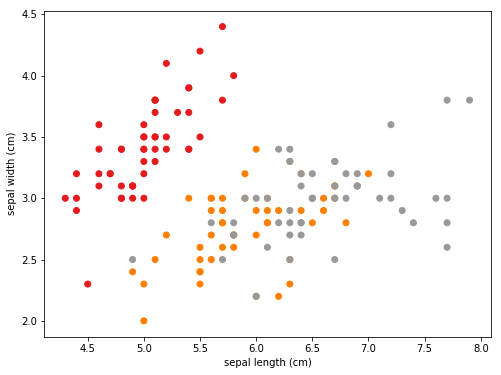

In [7]:
# look at the data
plt.figure(1, figsize=(8, 6))

# iris.target[iris.target > 0] = 1  # distinguish only two kind of iris flowers

feature_1 = iris.data[:, 0]
feature_2 = iris.data[:, 1]
plt.scatter(feature_1, feature_2, c=iris.target, cmap=plt.cm.Set1)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

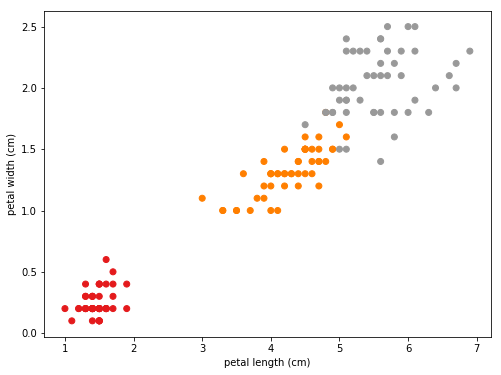

In [8]:
# plot the data, again
plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target, cmap=plt.cm.Set1)

plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

### Preprocessing

This would include things like feature extraction, dealing with missing numbers, outlier detection, data normalization, etc. pp.

### Modeling

In [9]:
from sklearn import linear_model

# train a logistic regressor to classify the data
clf = linear_model.LogisticRegression()

X_train = iris.data[:-10] 
y_train = iris.target[:-10]
X_test = iris.data[-10:]
y_test = iris.target[-10:]

# train a classifier
clf.fit(X_train, y_train)

# make predictions using the trained classifier
predictions = clf.predict(X_test)

print("Predicted label(s): %s" % predictions)
print("True label(s): %s" % y_test)

Predicted label(s): [2 2 2 2 2 2 2 2 2 2]
True label(s): [2 2 2 2 2 2 2 2 2 2]


😮 ... Oops

### Modeling, again

In [10]:
# shuffle the data
shuffle_index = np.random.permutation(n_samples)
# print(shuffle_index)

# use 10-20 percent of the data for testing, the rest for training
split = int(n_samples * 0.1)
# print()
print(split)

# split the data into training and test sets
test_idx = shuffle_index[:split]
train_idx = shuffle_index[split:]
# print(test_idx)
# print(train_idx)

X_train = iris.data[train_idx]
X_test = iris.data[test_idx]
y_train = iris.target[train_idx]
y_test = iris.target[test_idx]

# print(y_train)
# print(y_test)

15


In [11]:
# make a new classifier
clf = linear_model.LogisticRegression()  # C=1e5
# clf = sklearn.svm.SVC(gamma=0.001, C=100.)

# train a classifier
clf.fit(X_train, y_train)

# make predictions using the trained classifier
y_pred = clf.predict(X_test)

print("Predicted labels: %s" % y_pred)
print("True labels     : %s" % y_test)

Predicted labels: [1 0 1 1 0 1 2 1 2 1 1 0 2 1 0]
True labels     : [1 0 1 1 0 1 2 1 2 1 1 0 2 1 0]


### Model Evaluation

In [12]:
from sklearn import metrics

In [13]:
# to make it easier we will distinguish only two classes here
# i.e. turn the problem into a so-called binary classification problem

# make a new classifier
clf = linear_model.LogisticRegression()

y_train[y_train == 2] = 1
y_test[y_test == 2] = 1

# train a classifier
clf.fit(X_train, y_train)

# make predictions using the trained classifier
y_pred = clf.predict(X_test)

print("Predicted labels: %s" % y_pred)
print("True labels     : %s" % y_test)

Predicted labels: [1 0 1 1 0 1 1 1 1 1 1 0 1 1 0]
True labels     : [1 0 1 1 0 1 1 1 1 1 1 0 1 1 0]


#### Accuracy

The number of true positive plus the number of true negatives divided by the number of predictions.

In [14]:
# the number of true positives and true negatives in one go
true_predictions = len(y_pred[y_pred == y_test])
print(true_predictions / len(y_pred))

1.0


In [15]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

1.0


#### F1-Score

Task: Calculate the number of false positives and the number of false negatives in the predictions.

<img width="400px" align="left" src="files/fscore.png">

In [17]:
# make a new classifier
clf = linear_model.LogisticRegression()

# get the original three classes again
y_train = iris.target[train_idx]
y_test = iris.target[test_idx]

# train a classifier
clf.fit(X_train, y_train)

# make predictions using the trained classifier
y_pred = clf.predict(X_test)

print("Predicted labels: %s" % y_pred)
print("True labels     : %s" % y_test)

Predicted labels: [1 0 1 1 0 1 2 1 2 1 1 0 2 1 0]
True labels     : [1 0 1 1 0 1 2 1 2 1 1 0 2 1 0]


In [18]:
f1_score = metrics.f1_score(y_test, y_pred, average=None)
print(f1_score)

[1. 1. 1.]


### Task for who finished the rest 😉

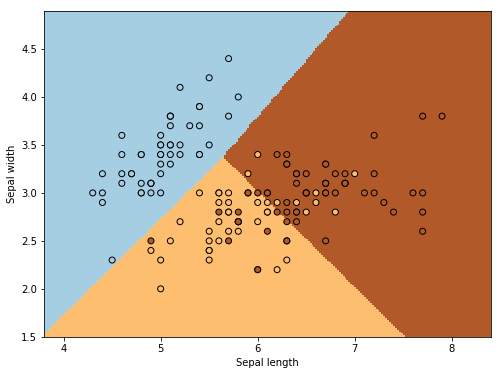

In [19]:
# Advanced snippet from http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

# Task: understand the following code which plots the decision boundaries of the trained classifier for two features
# and adapt it such that it shows the decision boundaries aka rules for the other two features.

# load the data set
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only use the first two features because it's easier to visualize 2D than 4D
Y = iris.target

h = .02  # step size in the mesh

# instantiate a classifer and train it
logreg = sklearn.linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y)

# plot the decision boundary
# therefore assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# plot the training samples
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()